In [1]:
import beak
from Bio import AlignIO

import matplotlib
import matplotlib.pyplot as plt

# in line magic for auto-reloading modules
%load_ext autoreload
%autoreload 2

/opt/anaconda3/envs/beak/lib/python3.10/site-packages/seqlogo/seqlogo.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
# load sequence alignments
file = '/Users/micaholivas/Desktop/Stanford/Research/Projects/AcyP_alignments/acyp_seqs_big_aln_filtered.fasta'
aln = AlignIO.read(file, 'fasta')
aln

<<class 'Bio.Align.MultipleSeqAlignment'> instance (14360 records of length 8462) at 1a04cfe20>

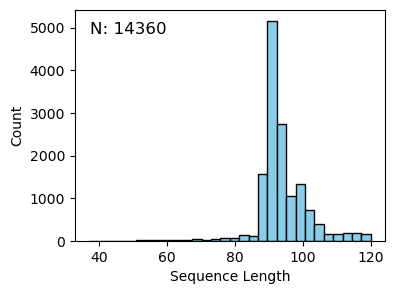

In [3]:
# plot length hist
beak.viz.plot_seq_length_hist(aln)

In [4]:
# subsample alignment
aln = beak.alignments.subsample_aln(aln, 
                                    n_sequences=3000, 
                                    random_state=42,
                                    keep_records=['UniRef90_P14621']
                                    )
aln

<<class 'Bio.Align.MultipleSeqAlignment'> instance (3000 records of length 8462) at 1a04cfa30>

In [5]:
# ungap
aln = beak.alignments.ungap(aln, 
                            threshold=0.75)

Reconstructing ungapped records: 100%|██████████| 3000/3000 [00:00<00:00, 164257.06it/s]


In [6]:
# generate PSSM
pssm = beak.alignments.aln_to_pssm(aln, as_freq=True)
pssm

Calculating PSSM: 100%|██████████| 22/22 [00:00<00:00, 1582.40it/s]


A         C         D         E         F         G         H  \
0    0.019333  0.001000  0.017000  0.018000  0.002000  0.015333  0.003667   
1    0.033000  0.001000  0.034667  0.024000  0.001333  0.021000  0.006000   
2    0.049667  0.000000  0.037000  0.038000  0.001000  0.030000  0.007000   
3    0.079333  0.002000  0.065000  0.068000  0.003000  0.038000  0.010333   
4    0.039333  0.003000  0.025333  0.041333  0.007667  0.010333  0.014333   
..        ...       ...       ...       ...       ...       ...       ...   
100  0.038333  0.001667  0.061667  0.244333  0.006667  0.025000  0.029333   
101  0.016667  0.001000  0.001333  0.033000  0.003667  0.001000  0.000667   
102  0.026333  0.002000  0.005667  0.038333  0.004000  0.023667  0.016667   
103  0.032333  0.000667  0.012333  0.019667  0.030667  0.050667  0.035667   
104  0.009333  0.000667  0.018667  0.005667  0.005333  0.015000  0.004000   

            I         K         L  ...         P         Q         R  \
0    0.003333  0.011667  0.012667  ...  0.018667  0.010000  0.006000   
1    0.002667  0.012000  0.008667  ...  0.024000  0.011333  0.009333   
2    0.006000  0.012333  0.007667  ...  0.027333  0.015667  0.008000   
3    0.007000  0.034000  0.014333  ...  0.034000  0.017667  0.021333   
4    0.046667  0.077000  0.043000  ...  0.030667  0.038000  0.080333   
..        ...       ...       ...  ...       ...       ...       ...   
100  0.019000  0.038000  0.013000  ...  0.001333  0.042333  0.116333   
101  0.395667  0.017333  0.009667  ...  0.004000  0.062333  0.024000   
102  0.046667  0.074667  0.106000  ...  0.000333  0.013000  0.371000   
103  0.003667  0.012667  0.006333  ...  0.093333  0.011667  0.136667   
104  0.002000  0.000667  0.006667  ...  0.001667  0.003667  0.005667   

            S         T         V         W         Y         -    X  
0    0.033667  0.015667  0.006667  0.000000  0.002333  0.719333  0.0  
1    0.039333  0.028000  0.007000  0.000667  0.001000  0.627667  0.0  
2    0.054333  0.038333  0.013667  0.000333  0.000667  0.442333  0.0  
3    0.068333  0.045333  0.012000  0.000667  0.003333  0.326667  0.0  
4    0.039333  0.073667  0.043333  0.001667  0.006000  0.109000  0.0  
..        ...       ...       ...       ...       ...       ...  ...  
100  0.100667  0.061667  0.047333  0.001667  0.008000  0.123000  0.0  
101  0.003333  0.042333  0.244000  0.000333  0.002667  0.129667  0.0  
102  0.010667  0.057000  0.045667  0.003667  0.006000  0.139000  0.0  
103  0.025667  0.005667  0.005333  0.016667  0.152333  0.335667  0.0  
104  0.022333  0.132333  0.003000  0.007000  0.004667  0.743667  0.0  

[105 rows x 22 columns]

In [7]:
# get consensus sequence
consensus = beak.alignments.aln_to_consensus(aln,
                                             threshold=0)
consensus

Generating consensus sequence: 100%|██████████| 105/105 [00:00<00:00, 11711.26it/s]


'----MKRVHVRVSGRVQGVGFRASTRREARRLGLTGWVRNL--DG--VEAVAEGPEEAV-A--LAWLR-G-PP-A--VDRVEVE---------------FEIR--'

In [8]:
# get UniRef90_P14621 from aln
for record in aln:
    if record.id == 'UniRef90_P14621':
        # ungap sequence
        ref_seq = str(record.seq).replace('-', '')
        # print with ruler
        print('Reference sequence (ungapped):')
        print(ref_seq)
        for i in range(len(ref_seq)):
            if i % 10 == 0:
                print('|', end='')
            else:
                print('.', end='')
        print()
        break

Reference sequence (ungapped):
MSTVDYEVFGRQGVFRMEARKIGVVGWVKNTSTVKSWLSGSPIDRTNSNETISRY
|.........|.........|.........|.........|.........|....


(<Figure size 15750x1200 with 1 Axes>,
 <Axes: xlabel='Position', ylabel='Frequency'>,
 <logomaker.src.Logo.Logo at 0x1a18099c0>)

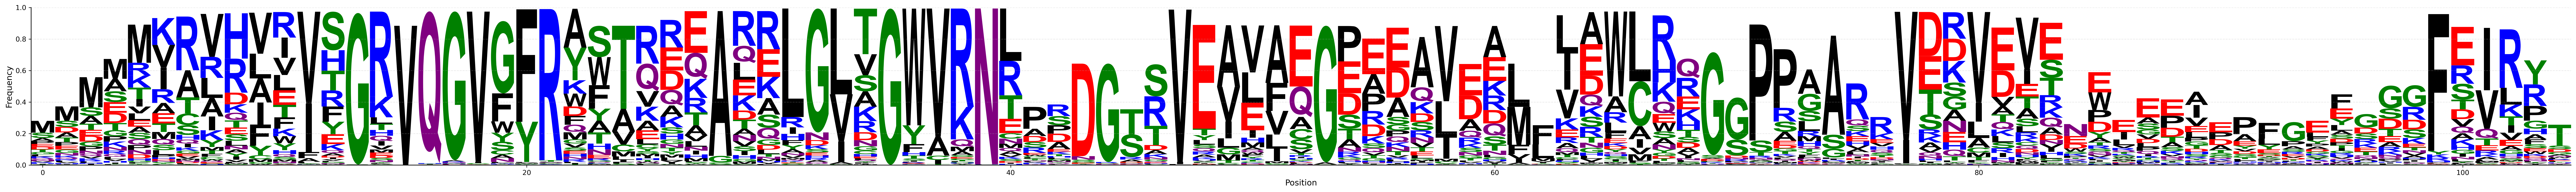

In [9]:
# motif = 'G.VQGVG.{1,4}R'

beak.viz.plot_sequence_logo(pssm,
                            alignment=aln,
                            # motif=motif,
                            )

⚠️  Interactive mode requested but matplotlib backend is not interactive
To enable interactive pan/zoom in Jupyter notebooks, run:
    %matplotlib widget

Then re-run this plot command.


(<Figure size 6000x1200 with 1 Axes>,
 <Axes: xlabel='Position', ylabel='Frequency'>,
 <logomaker.src.Logo.Logo at 0x1a29b2e90>)

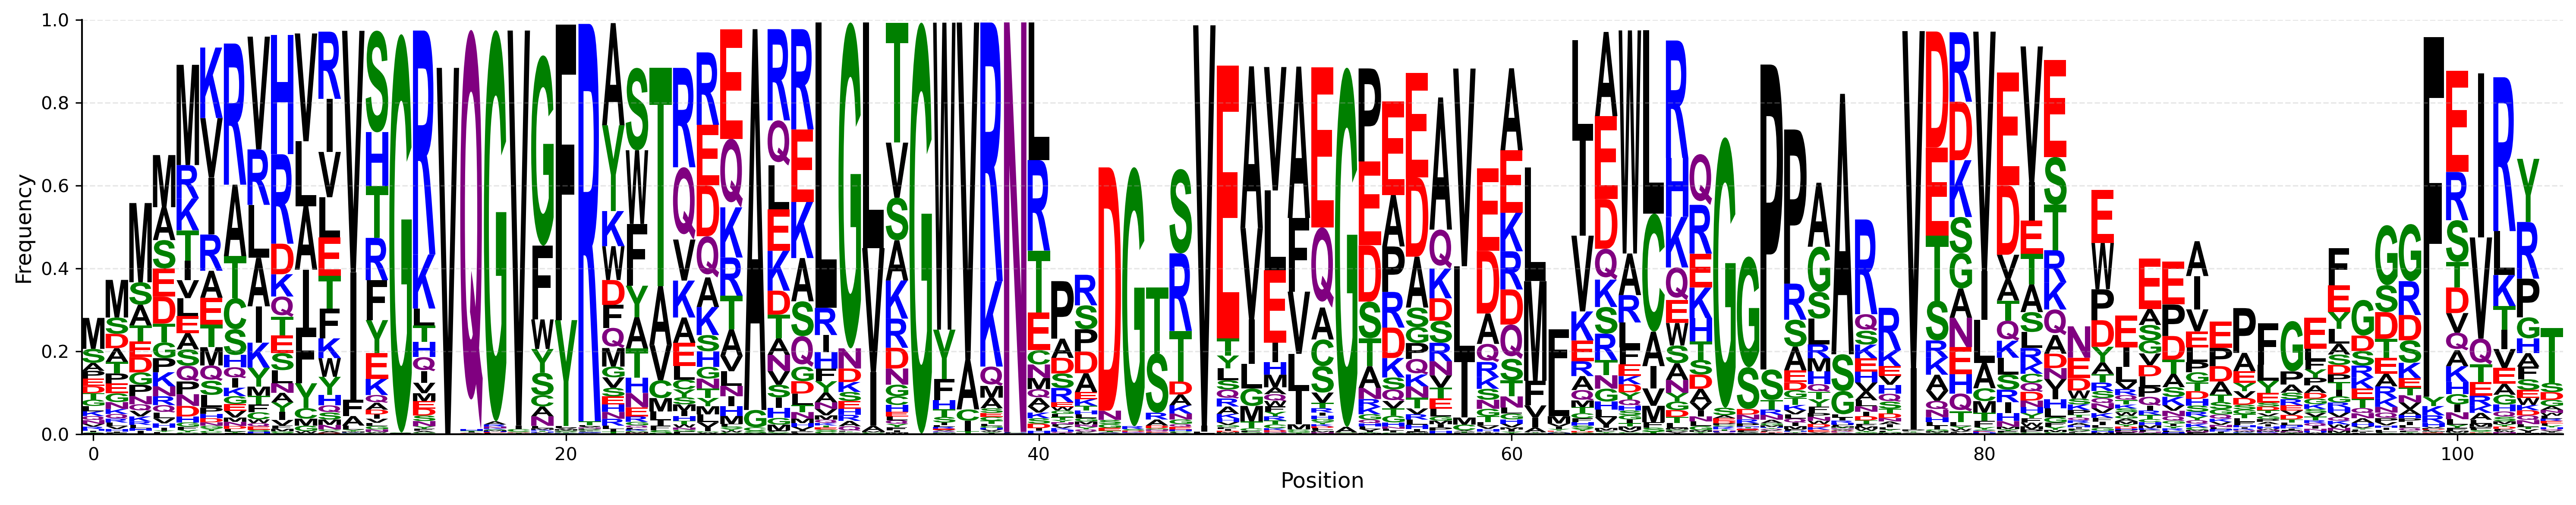

In [10]:
beak.viz.plot_sequence_logo(pssm,
                            interactive=True,
                            )